<a href="https://colab.research.google.com/github/juliana-zh/machine_learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "Титаник"



Lectori benevolo salutem! :)

Цель данного проекта: предсказать выживших на "Титанике" по заданным признакам.



#### План:


1. Понять какие есть данные (.info() .describe())
2. Построение гистограмм, box plots.
3. Подсчет частот значений (value counts)
4. Обработка пропущенных данных
5. Выявление корелляции между признаками
6. Исследование отдельных вопросов
7. Создание новых признаков
8. Предобработка
9. Нормализация

* подсчет значения Baseline
* сравнение качества моделей с помощью кросс-валидации

Обучение и валидацию проводим на тренировочной выборке. Финальные предсказания делаем на тестовой выборке.



---



In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [160]:
training = pd.read_csv('https://raw.githubusercontent.com/juliana-zh/machine_learning/main/datasets/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/juliana-zh/machine_learning/main/datasets/titanic/test.csv')

In [161]:
# для всех значений обучающей и тестовой выборок добавляем признак 'train_test': индикатор, является ли запись принадлежащей обучающей выборке
training['train_test'] = 1
test['train_test'] = 0
# в обучающей выборке уже есть признак 'Survived', в тестовой его нет, добавляем. Он является целевым.
test['Survived'] = np.NaN
all_data = pd.concat([training,test])



---



## Исследование исходных данных

#### Посмотрим какие есть признаки:

In [162]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Что значат признаки?

* survival - выжил или нет	(0 = No, 1 = Yes)
* pclass	- класс обслуживания	(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex	- пол
* Age	- возраст (в годах)
* sibsp - количество братьев, сестер, супруга/супруги на борту для данного человека
* parch	- количество родителей/детей на борту для данного человека
* ticket - номер билета
* fare - плата за проезд
* cabin	- номер каюты
* embarked - в каком городе зашел на борт пассажир	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [163]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [164]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [165]:
# отделим численные и категориальные признаки
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#### Посмотрим распределение пассажиров по численным признакам

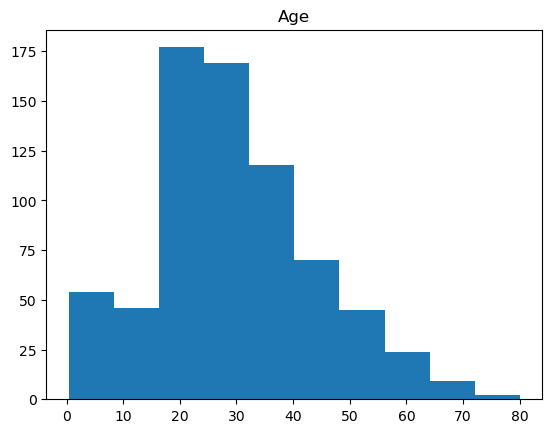

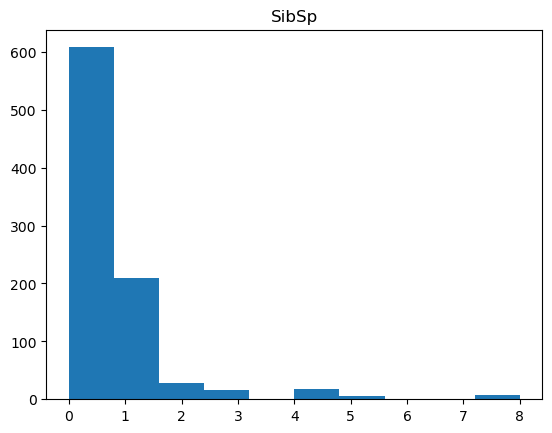

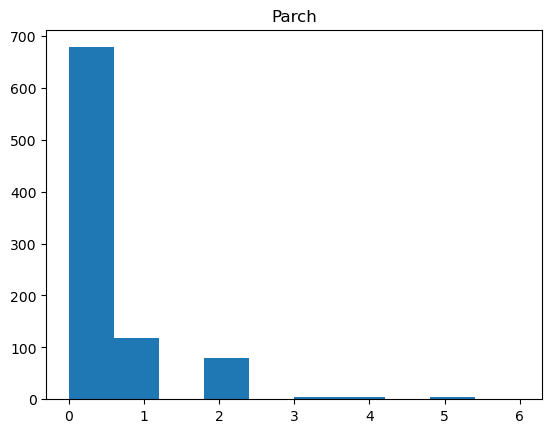

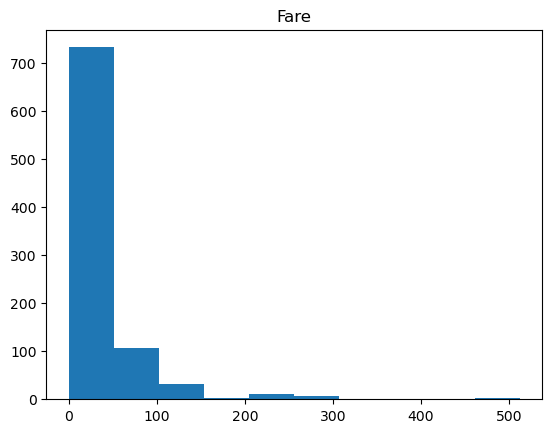

In [166]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Видим, что распределение по возрасту близко к нормальному распределению

#### Исследуем, какие признаки коррелируют между собой:

In [167]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<Axes: >

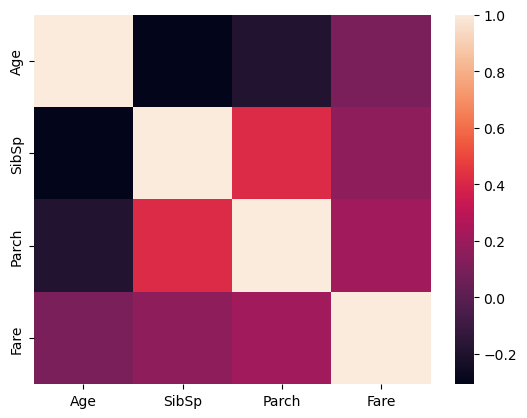

In [168]:
sns.heatmap(df_num.corr())

Видим, что признак кол-ва родителей/детей коррелирует с признаком кол-ва братьев/сестер/супругов

#### Исследуем долю выживших в зависимости от пола, города посадки на корабль и класса обслуживания, а также распределение значений категориальных признаков

Средние значения среди выживших и невыживших по признакам 'Age', 'SibSp', 'Parch', 'Fare':

In [169]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


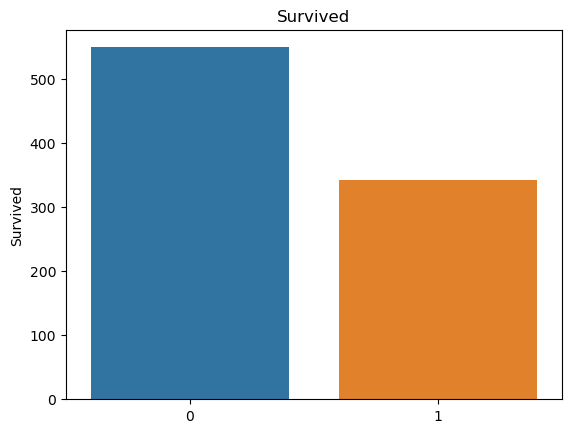

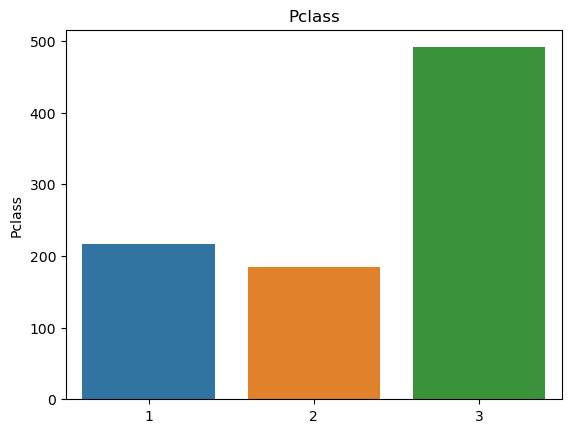

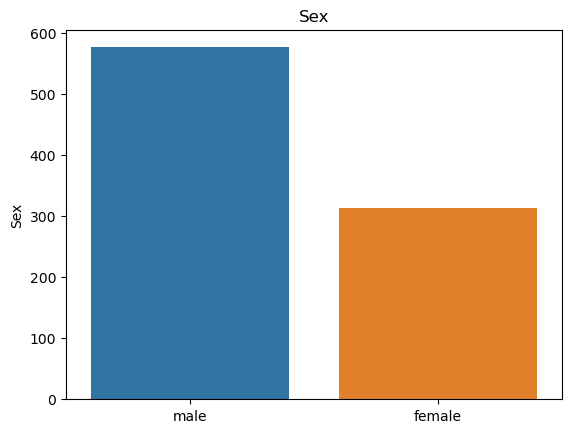

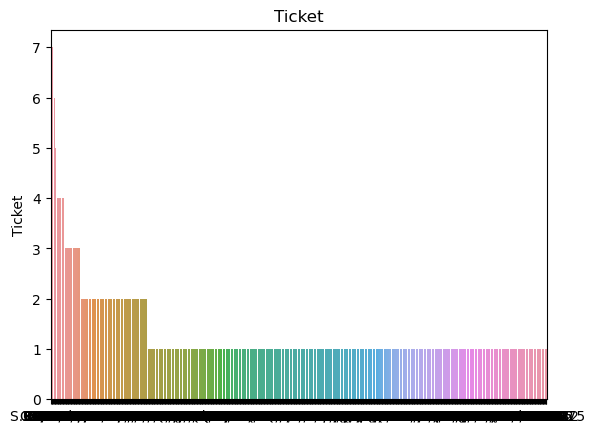

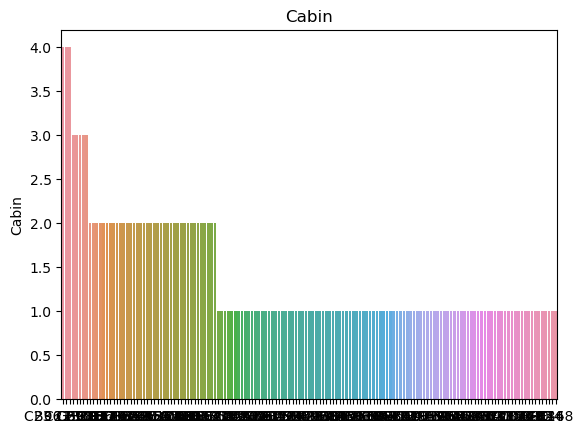

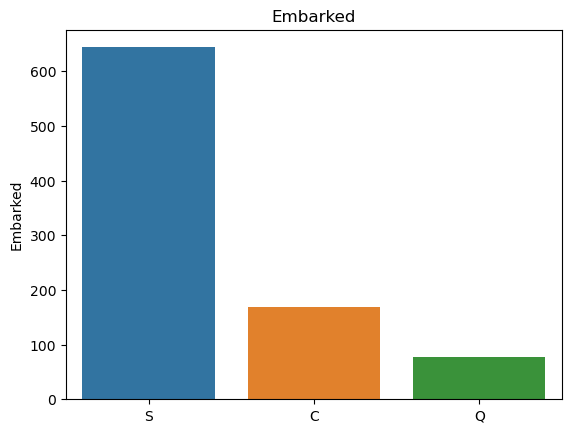

In [170]:
for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index,y = df_cat[i].value_counts()).set_title(i)
    plt.show()

Видим, что графики значений номеров билетов и кают получились неразборчивыми. Преобразуем их вскоре через формирование новых признаков (feature engineering).

In [171]:
pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [172]:
pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [173]:
pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## Формирование новых признаков (feature engineering)

Зачем? Для того, чтобы данные были в более удобоваримом формате. Зачем? Это может позволить лучше выявить закономерности при обучении.

Пример: у нас есть имена (напр. "Heikkinen, Miss. Laina").
А мы из них можем получить признак со значениями вида обращения к пассажиру Mr, Mrs, Miss, the Countess et al.

И возможно, что это приведет к обнаружению закономерности при машинном обучении

Какие новые признаки можно сформировать?

На основе:
* id каюты
* типа билета
* вида обращения к пассажиру

##### Создаем новые признаки по имеющемуся признаку: строка с информацией о занятых каютах пассажира

In [174]:
df_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Создаем новый признак **cabin_multiple** (категориальный). Он отображает то, в какое количество кают был куплен билет у конкретного человека

In [175]:
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [176]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


Создаем новый признак **cabin_adv** (категориальный). Разбиваем на категории: по первой букве id каюты. Если id каюты для пассажира не указан, то относим таких пассажиров к категории 'n'

In [177]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

Считаем частоты первых букв id кают:

In [178]:
training.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

Здесь можно увидеть долю выживших по данной категории:

In [179]:
pd.pivot_table(training, index='Survived', columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


##### Создаем новые признаки по имеющемуся признаку: id билета

In [180]:
training.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Создаем новый признак **numeric_ticket** (бинарный). Он показывает, является ли id билета числом или нет

In [181]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [182]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

Создаем новый признак **ticket_letters** (категориальный). Он показывает к какому **типу** относится билет на корабль.

In [183]:
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [184]:
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

Доля выживших, у кого билет являеся числовым или не числовым:

In [185]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


Доля выживших в зависимости от категории типа билета:

In [186]:
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


##### Создаем новый признак по имеющемуся: полное имя пассажира. Новый признак: обращение к пассажиру (Mr, Mrs, Miss, the Countess et al.). Он категориальный

In [187]:
training.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [188]:
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [189]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

## Предобработка данных для модели

**План:**

1. Удалить строки, у которых значение признака Embarked нулевое. Таких строк только две.

2. Выбираем из всех признаков только значимые для обучения. Например, имя пассажира и его id нам никакой полезной информации не дост для выявления закономерностей

3. Трансформируем категориальные признаки для удобства обработки. Мы должны также поменять вслед за этим и тестовую выборку

4. Сопоставить имеющиеся данные со средним значением стоимости билета и возраста

5. Нормализация признака оплаты за проезд (fare) используя логарифм для того, чтобы признак приобрел вид нормально распределенного

6. Проскалируем значения бинарных признаков стандартным scaler-ом

Создаем все категориальные значения (мы ранее уже это делали, еще раз делаем сейчас) одновременно для обучающей и тестовой выборок:

In [190]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

Заполняем пропуски значением медианы:

In [191]:
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

Удаляем строки с пропущенным значением признака Embarked. Таких строк немного: их всего две в обучающей выборке и ноль в тестовой

In [192]:
all_data.dropna(subset=['Embarked'],inplace = True)

Пробуем нормализовать значения признака SibSp:

<Axes: >

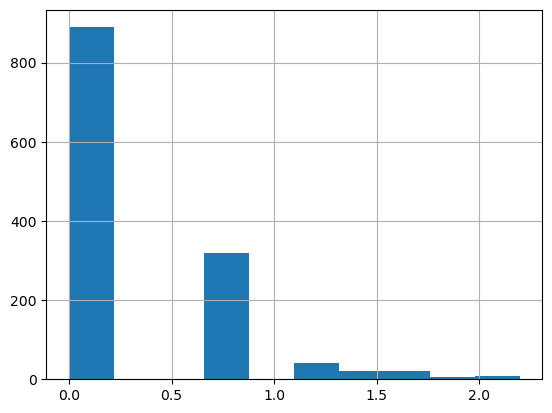

In [193]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

Пробуем нормализовать значения признака Fare (стоимость билета):

<Axes: >

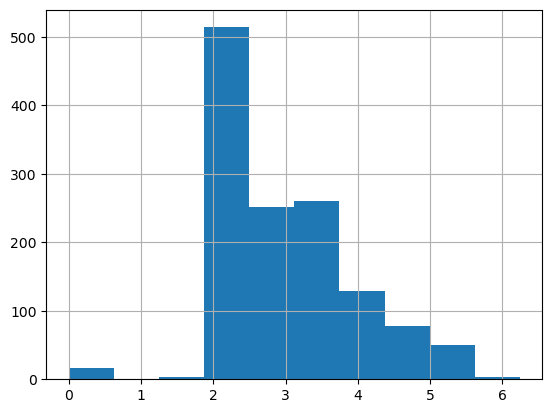

In [194]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

Конвертируем значения признака Pclass (от типа int64 к типу string):

In [195]:
all_data.Pclass = all_data.Pclass.astype(str)

Отбираем только значимые признаки:

In [196]:
all_data_selected = all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']]

Конверитруем значения категориальных признаков в значения признаков-индикаторов (dummies). Так как мы явно не указываем параметр columns у функции get_dummies, то все значения признаков типа object, string, или category будут автоматически сконвертированы.

In [197]:
all_data_selected_with_dummies = pd.get_dummies(all_data_selected)

Разбиваем выборку снова на обучающую и тествую

In [198]:
X_train = all_data_selected_with_dummies[all_data_selected_with_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_data_selected_with_dummies[all_data_selected_with_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

Скалируем значения признаков Age, SibSp, Parch, norm_fare. Например, Age выбивается по своему диапазону значений. Это не очень хорошо для обучения.

In [199]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_data_selected_with_dummies_scaled = all_data_selected_with_dummies.copy()
all_data_selected_with_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_data_selected_with_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
res = all_data_selected_with_dummies_scaled
res


,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,0.739957,-0.479537,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0.701127,-0.479537,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.114301,-0.479537,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [200]:
X_train_scaled = res[res.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = res[res.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test==1].Survived

In [201]:
y_train.shape

(889,)

## Построение модели. Оценка базовой производительности (Baseline Validation Performance)

- Naive Bayes (72.2%)
- Logistic Regression (82.2%)
- Decision Tree (77.7%)
- K Nearest Neighbor (81%)
- Random Forest (77.7%)
- **Support Vector Classifier (83.3%)**
- Xtreme Gradient Boosting (82.0%)
- Soft Voting Classifier - All Models (82.4%)

Возьмем несколько моделей с параметрами по умолчанию. Получим значения их базовой производительности на кросс-валидации (5 фолдов). Это даст нам возможность увидеть, насколько улучшается качество модели при настройке параметров (tuning). Отметим, что даже если какая-то из моделей на данный момент показала хоршее значение базовой производительности на кросс-валидации, это совсем не значит, что она продемонстрирует лушее качество на тестовой выборке в будущем.

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Используем наивный байесовский классификатор:

In [203]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


Логистическая регрессия:

In [204]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [205]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


Решающее дерево:

In [206]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [207]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


Алгоритм KNN (метод k ближайших соседей)

In [208]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [209]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


Алгоритм случайного леса (Random Forest)

In [210]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [211]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


Метод опорных векторов (SVM):

In [212]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


Гридиентный бустинг:

In [213]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


Ансамбль классификаторов. Голосование типа 'soft', где учитывается уверенность в предсказании каждой из моделей

In [214]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('svc', svc), ('xgb', xgb)], voting = 'soft')

In [215]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.8258427  0.79775281 0.84745763]
0.8223005141877738


In [216]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
# base_submission.to_csv('base_submission.csv', index=False)

## Построение модели. Оценка производительности при настройке параметров

|Model|Baseline|Tuned Performance|
|-----|--------|-----------------|
|Naive Bayes| 72.2%| NA|
|Logistic Regression| 82.2%| 82.8%|
|Decision Tree| 77.7%| NA|
|K Nearest Neighbor| 81.0%|83.0%|
|Random Forest| 80.2%| 83.6%|
|Support Vector Classifier| 83.3%| 83.4%|
|Xtreme Gradient Boosting| 82.0%| **85.5%**|

После того, как мы получили базовые значения качества моделей, мы можем улучшить показатели путем настройки параметров. Для моделей случайного леса и градиентного бустинга будем использовать рандомизированный поиск для оптимизации по времени

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [218]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [219]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [220]:
type(best_clf_lr)

sklearn.model_selection._search.GridSearchCV

In [221]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8290611312131023
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [222]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Так как общее пространство признаков слишком большое, мы можем предварительно использовать рандомизированный поиск для сужения пространства признаков. Взять лучшую модель и далее сделать более тщательный поиск через gridSearch

In [223]:
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')"""

"\nrf = RandomForestClassifier(random_state = 1)\nparam_grid =  {'n_estimators': [100,500,1000],\n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n\nclf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_rf_rnd,'Random Forest')"

In [224]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 10, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


Выясним наиболее значимые признаки:

<Axes: >

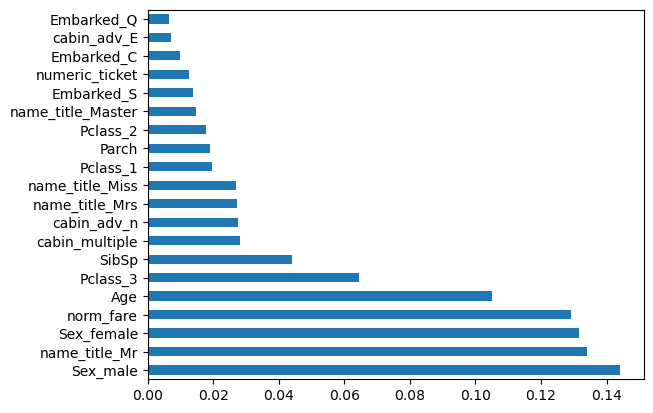

In [225]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [226]:
"""xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')"""

"xgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\n#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\n#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)\n#clf_performance(best_clf_xgb,'XGB')\nclf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_xgb_rnd,'XGB')"

In [227]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8549101758395226
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [228]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
# submission_xgb.to_csv('xgb_submission3.csv', index=False)

## Дополнительно протестируем ансамбли моделей

1) Эксперимент с комитетом из трех алгоритмов с жестким голосованием (KNN, SVM, RF) (81.2%)

2) Эксперимент с комитетом из трех алгоритмов с мягким голосованием (KNN, SVM, RF) (81.3%)

3) Эксперимент с комитетом из алгоритмов качества > 80%, за исключением xgb, с мягким голосованием (KNN, RF, LR, SVC) (82.7%)

4) **Эксперимент с комитетом из алгоритмов с мягким голосованием (KNN, SVM, RF, LR, XGB) (83.4%) (Best Performance)**

In [229]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft')
voting_clf_four = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft')
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_four :',cross_val_score(voting_clf_four,X_train,y_train,cv=5))
print('voting_clf_four mean :',cross_val_score(voting_clf_four,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.79213483 0.81460674 0.82022472 0.79775281 0.83615819]
voting_clf_hard mean : 0.8121754586427983
voting_clf_soft : [0.78651685 0.82022472 0.81460674 0.79775281 0.85310734]
voting_clf_soft mean : 0.8133180981400369
voting_clf_four : [0.80898876 0.83146067 0.8258427  0.80898876 0.85875706]
voting_clf_four mean : 0.8268075922046595
voting_clf_xgb : [0.8258427  0.83146067 0.83707865 0.80337079 0.8700565 ]
voting_clf_xgb mean : 0.833561861232781


В случае использования мягкого голосования мы можем предоставить им веса, с которыми они станут голосовать. Найдем оптимальное сочетание через GridSearch

In [230]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8324382657271631
Best Parameters: {'weights': [2, 2, 1]}


Делаем предсказания

In [231]:
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_four.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)
best_rf.fit(X_train_scaled, y_train)


y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_four = voting_clf_four.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)

In [232]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_four}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_four' : y_hat_vc_four,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [233]:
# submission.to_csv('submission_rf.csv', index =False)
# submission_2.to_csv('submission_vc_hard.csv',index=False)
# submission_3.to_csv('submission_vc_soft.csv', index=False)
# submission_4.to_csv('submission_vc_four.csv', index=False)
# submission_5.to_csv('submission_vc_xgb2.csv', index=False)